In [1]:
import numpy as np
import pandas as pd
import scipy.interpolate as interp

class trajReader():
    def __init__(self, file_dir):
        _, self.header, self.traj = self.read_sto(file_dir)
        
    def get_traj(self):
        return self.traj
        
    def read_sto(self, file_dir):
        '''
        read the sto file into DataFrame
        '''
        file_name = file_dir[file_dir.rfind("/")+1:]
        try:
            file_num = int(file_name[0:file_name.find("_")])-1
        except:
            file_num = None

        # extract file header
        log = pd.read_csv(file_dir, header=None)[0]
        header_end = log.index[log == "endheader"][0]
        header = log[0:header_end].str.split("=", n = -1, expand = True)
        header = header.set_index(0)
        header = header[1].to_dict()

        for key in header.keys():
            try:
                header[key] = float(header[key])
                if header[key].is_integer():
                    header[key] = int(header[key])
            except:
                pass

        # extract trajectories
        traj = log[header_end+1:].str.split("\t", n = -1, expand = True)
        traj = traj.reset_index(drop=True)
        traj.columns = traj.iloc[0]
        traj = traj.drop(traj.index[0])
        traj = traj.astype("float")
        return file_num, header, traj
    
    def interpolate_traj(self, dt=0.01):
        '''
        interpolate trajectory to match certain temporal resolution
        '''
        start_time = self.traj.iloc[0,0]
        end_time = self.traj.iloc[-1,0]
        length = int((end_time - start_time)/dt)+1
        
        out = {}
        out["time"] = np.arange(0, end_time-start_time, dt)
        for name in self.traj.iloc[:,1:].columns: # skip the first column which is time
            out[name] = self.interpolate_data(self.traj.iloc[:,0], self.traj[name], out["time"])
        return pd.DataFrame(out)
    
    def interpolate_data(self, t, data, target_t):
        '''
        interpolate a vector to a desired length
        data: a vector of data (same size as t)
        t: a vector of time, if None, assume data is evenly spaced
        target_t: desired output time vector
        '''
        data = np.array(data)
        t = np.array(t)
        target_t = np.array(target_t)
        dataInterp = interp.interp1d(t, data)
        dataStrech = dataInterp(target_t)
        return dataStrech

In [2]:
trajreader = trajReader("tracking_solution_fullStride.sto")
traj_original = trajreader.get_traj()
traj_original.head(5)

,time,/jointset/ground_pelvis/pelvis_tilt/value,/jointset/ground_pelvis/pelvis_tx/value,/jointset/ground_pelvis/pelvis_ty/value,/jointset/hip_r/hip_flexion_r/value,/jointset/hip_l/hip_flexion_l/value,/jointset/knee_r/knee_angle_r/value,/jointset/knee_l/knee_angle_l/value,/jointset/ankle_r/ankle_angle_r/value,/jointset/ankle_l/ankle_angle_l/value,...,/forceset/tib_ant_r,/forceset/hamstrings_l,/forceset/bifemsh_l,/forceset/glut_max_l,/forceset/iliopsoas_l,/forceset/rect_fem_l,/forceset/vasti_l,/forceset/gastroc_l,/forceset/soleus_l,/forceset/tib_ant_l
1,0.000000,-0.203182,0.133660,0.849292,-0.168596,0.673538,-0.102233,-0.126555,0.181387,0.156535,...,0.01,0.283675,0.207342,0.017821,0.010005,0.01,0.010000,0.205668,0.010003,0.079714
2,0.009888,-0.197995,0.149796,0.848098,-0.183339,0.672465,-0.118759,-0.166545,0.162393,0.148613,...,0.01,0.255414,0.108672,0.146436,0.010003,0.01,0.016628,0.107835,0.010003,0.081055
3,0.019777,-0.192311,0.166217,0.847172,-0.196981,0.671107,-0.138075,-0.209353,0.139988,0.137502,...,0.01,0.227154,0.010003,0.275051,0.010000,0.01,0.023255,0.010001,0.010003,0.082396
4,0.029665,-0.186304,0.182824,0.846600,-0.208472,0.668730,-0.161375,-0.250172,0.113950,0.124882,...,0.01,0.271560,0.010005,0.263081,0.010000,0.01,0.105970,0.010001,0.010002,0.136710
5,0.039554,-0.180094,0.199545,0.846431,-0.216802,0.664451,-0.189934,-0.288321,0.084078,0.116105,...,0.01,0.315967,0.010008,0.251112,0.010000,0.01,0.188685,0.010001,0.010001,0.191024


In [3]:
traj_interp = trajreader.interpolate_traj(dt=0.01)
traj_interp.head(5)

,time,/jointset/ground_pelvis/pelvis_tilt/value,/jointset/ground_pelvis/pelvis_tx/value,/jointset/ground_pelvis/pelvis_ty/value,/jointset/hip_r/hip_flexion_r/value,/jointset/hip_l/hip_flexion_l/value,/jointset/knee_r/knee_angle_r/value,/jointset/knee_l/knee_angle_l/value,/jointset/ankle_r/ankle_angle_r/value,/jointset/ankle_l/ankle_angle_l/value,...,/forceset/tib_ant_r,/forceset/hamstrings_l,/forceset/bifemsh_l,/forceset/glut_max_l,/forceset/iliopsoas_l,/forceset/rect_fem_l,/forceset/vasti_l,/forceset/gastroc_l,/forceset/soleus_l,/forceset/tib_ant_l
0,0.00,-0.203182,0.133660,0.849292,-0.168596,0.673538,-0.102233,-0.126555,0.181387,0.156535,...,0.01,0.283675,0.207342,0.017821,0.010005,0.01,0.010000,0.205668,0.010003,0.079714
1,0.01,-0.197931,0.149981,0.848088,-0.183493,0.672450,-0.118977,-0.167028,0.162141,0.148488,...,0.01,0.255096,0.107559,0.147887,0.010003,0.01,0.016703,0.106731,0.010003,0.081070
2,0.02,-0.192176,0.166592,0.847159,-0.197240,0.671054,-0.138600,-0.210274,0.139401,0.137218,...,0.01,0.228156,0.010003,0.274781,0.010000,0.01,0.025122,0.010001,0.010002,0.083621
3,0.03,-0.186094,0.183390,0.846595,-0.208754,0.668585,-0.162341,-0.251463,0.112939,0.124585,...,0.01,0.273063,0.010005,0.262676,0.010000,0.01,0.108769,0.010001,0.010002,0.138548
4,0.04,-0.179809,0.200302,0.846442,-0.216994,0.664101,-0.191515,-0.289807,0.082550,0.116000,...,0.01,0.314452,0.010008,0.251054,0.010000,0.01,0.190127,0.010001,0.010001,0.192202


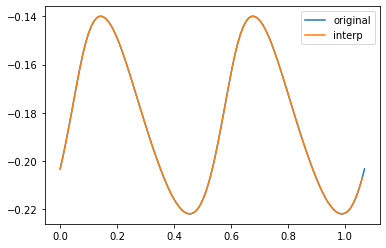

In [4]:
import matplotlib.pyplot as plt

plt.plot(traj_original.iloc[:,0],traj_original.iloc[:,1], label="original")
plt.plot(traj_interp.iloc[:,0],traj_interp.iloc[:,1], label="interp")
plt.legend()